# 1.a

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import linalg as LA

In [2]:
##### 1a #####

N = 100
Y1 = np.random.randn(N,2)
A1 = np.array([[1, 0],[0,sqrt(2)]])
B1 = np.array([1, 2])
X1 = np.dot(Y1, A1.T) + B1

Y2 = np.random.randn(N,2)
A2 = np.array([[sqrt(2), 0],[-9/5/sqrt(2), sqrt(19/2)/5]])
B2 = np.array([-1, 1])
X2 = np.dot(Y2, A2.T) + B2

Y3 = np.random.randn(N,2)
A3 = np.array([[sqrt(3), 0], [1/sqrt(3), sqrt(5/3)]])
B3 = np.array([2, -2])
X3 = np.dot(Y3, A3.T) + B3

# 1.b

In [3]:
##### 1.b #####

mu1 = sum(X1)/N
mu2 = sum(X2)/N
mu3 = sum(X3)/N

sigma1 = np.dot(np.transpose((X1 - mu1)), (X1 - mu1))/(N-1)
sigma2 = np.dot(np.transpose(X2 - mu2), X2 - mu2)/(N-1)
sigma3 = np.dot(np.transpose(X3 - mu3), X3 - mu3)/(N-1)

w1, v1 = LA.eig(sigma1)
e11 = w1[0]
e12 = w1[1]
u11 = v1[:,0]
u12 = v1[:,1]

w2, v2 = LA.eig(sigma2)
e21 = w2[0]
e22 = w2[1]
u21 = v2[:,0]
u22 = v2[:,1]

w3, v3 = LA.eig(sigma3)
e31 = w3[0]
e32 = w3[1]
u31 = v3[:,0]
u32 = v3[:,1]

# 1.c

In [6]:
##### 1.c #####

Xhat1 = np.array([np.dot(u11, np.transpose(X1 - mu1))/sqrt(e11), \
                 np.dot(u12, np.transpose(X1 - mu1))/sqrt(e12)])

Xhat2 = np.array([np.dot(u21, np.transpose(X2 - mu2))/sqrt(e21), \
                 np.dot(u22, np.transpose(X2 - mu2))/sqrt(e22)])

Xhat3 = np.array([np.dot(u31, np.transpose(X3 - mu3))/sqrt(e31), \
                 np.dot(u32, np.transpose(X3 - mu3))/sqrt(e32)])

In [7]:
Xhat1.shape

(2, 100)

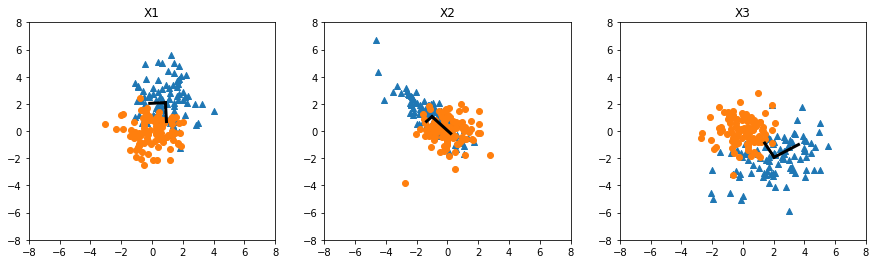

In [7]:
x1 = X1[:,0]
y1 = X1[:,1]
x2 = X2[:,0]
y2 = X2[:,1]
x3 = X3[:,0]
y3 = X3[:,1]

plt.figure(figsize=(15, 4))

plt.subplot(1,3,1)
plt.scatter(x1, y1,marker = '^')
plt.scatter(Xhat1[0], Xhat1[1],marker = 'o')
plt.plot((mu1[0], mu1[0]+ sqrt(e11) * u11[0]),(mu1[1], mu1[1] + sqrt(e11) * u11[1]), c = 'k', linewidth = 3)
plt.plot((mu1[0], mu1[0]+ sqrt(e12) * u12[0]),(mu1[1], mu1[1] + sqrt(e12) * u12[1]), c = 'k', linewidth = 3)
plt.title('X1')
plt.xlim((-8, 8))
plt.ylim((-8, 8))

plt.subplot(1,3,2)
plt.scatter(x2, y2,marker = '^')
plt.scatter(Xhat2[0], Xhat2[1],marker = 'o')
plt.plot((mu2[0], mu2[0]+ sqrt(e21) * u21[0]),(mu2[1], mu2[1] + sqrt(e21) * u21[1]), c = 'k', linewidth = 3)
plt.plot((mu2[0], mu2[0]+ sqrt(e22) * u22[0]),(mu2[1], mu2[1] + sqrt(e22) * u22[1]), c = 'k', linewidth = 3)
plt.title('X2')
plt.xlim((-8, 8))
plt.ylim((-8, 8))

plt.subplot(1,3,3)
plt.scatter(x3, y3,marker = '^')
plt.scatter(Xhat3[0], Xhat3[1],marker = 'o')
plt.plot((mu3[0], mu3[0]+ sqrt(e31) * u31[0]),(mu3[1], mu3[1] + sqrt(e31) * u31[1]), c = 'k', linewidth = 3)
plt.plot((mu3[0], mu3[0]+ sqrt(e32) * u32[0]),(mu3[1], mu3[1] + sqrt(e32) * u32[1]), c = 'k', linewidth = 3)
plt.title('X3')
plt.xlim((-8, 8))
plt.ylim((-8, 8))
plt.show()

# 5

In [21]:
####### Problem 5 #######

from mnist import MNIST
import numpy as np
import scipy.linalg as lg
import matplotlib.pyplot as plt

In [22]:
mndata = MNIST('./data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0

## 5.b

In [23]:
K = 10

def one_hot_encode(labels, k):
    
    Y = np.mat([[0 for ni in range(len(labels))] for ki in range(k)])
    
    for col in range(len(labels)):
        for row in range(k):
            if labels[col] == row:
                Y[row, col] = 1
                continue
    return Y

Y_train = one_hot_encode(labels_train, K)
Y_test = one_hot_encode(labels_test, K)

## 5.c

In [24]:
def train(X, Y, lamb):
    a = np.dot(X.T, X) + lamb * np.eye(len(X[0,:]))
    b = np.dot(X.T, Y)
    return lg.solve(a, b)

def predict(W, X):
    
    labels = np.array([0 for j in range(len(X))])
    for row in range(len(X)):
        y_temp = np.dot(W.T, X[row].T)
        labels[row] = np.argmax(y_temp)
    return labels.T
    
def accuracy(l1, l2):
    count = 0
    if len(l1) != len(l2):
        raise ValueError('Arraries must have same length')
    for i in range(len(l1)):
        if l1[i] == l2[i]: count += 1
    return count/len(l1)

In [25]:
W = train(X_train, Y_train.T, 1e-4)
train_labels = predict(W, X_train)
test_labels = predict(W, X_test)
print('The accuracy of training data is: %.3f%%' % (accuracy(train_labels, labels_train)*100))
print('The accuracy of test data is: %.3f%%' % (accuracy(test_labels, labels_test)*100))

The accuracy of training data is: 85.195%
The accuracy of test data is: 85.340%


## 5.d

In [26]:
from math import pi, sqrt

N = int(len(X_train))

L_train = np.mat([[0 for i in range(p_num)] for j in range(int(N*0.8))])
L_valid = np.mat([[0 for i in range(p_num)] for j in range(int(N*0.2))])    

In [27]:
index = [i for i in range(len(X_train))]
np.random.shuffle(index)

X_tr = X_train[index[0:int(N*0.8)]]
X_va = X_train[index[int(N*0.8):N]]
n = len(X_tr)
d = len(X_tr[0,:])

mu = 0
sigma = sqrt(0.1)

k = 0
P = [10, 50, 100, 200, 500, 1000, 2000, 4000, 6000]
p_num = len(P)
for p in P:
    
    G = np.random.normal(mu, sigma, (p,d))
    b = np.random.uniform(0, 2*pi, p)
    
    B = np.mat([b.T for i in range(n)])
    H_train = np.cos(np.dot(G, X_tr.T).T + B)
    
    B = np.mat([b.T for i in range(len(X_va))])
    H_valid = np.cos(np.dot(G, X_va.T).T + B)
    
    W = train(H_train, Y_train.T[index[0:int(N*0.8)]], 1e-4)
    
    L_train[:, k] = np.mat(predict(W, H_train)).T
    L_valid[:, k] = np.mat(predict(W, H_valid)).T
    k += 1

In [28]:
error_train = [0 for i in range(p_num)]
error_valid = [0 for i in range(p_num)]

for k in range(p_num):
    error_train[k] = 1-accuracy(L_train[:,k], labels_train[index[0:int(N*0.8)]])
    error_valid[k] = 1-accuracy(L_valid[:,k], labels_train[index[int(N*0.8):N]])

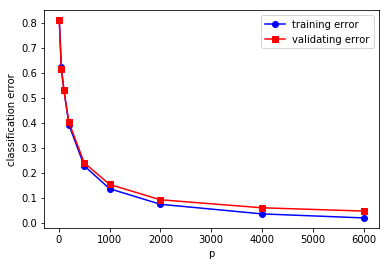

In [29]:
plt.figure()
plt.plot(P, error_train, 'bo-', label = 'training error')
plt.plot(P, error_valid, 'rs-', label = 'validating error')
plt.xlabel('p')
plt.ylabel('classification error')
plt.legend(loc='upper right')
plt.show()

# 5.e

In [13]:
pm = 6000

G = np.random.normal(mu, sigma, (pm,d))
b = np.random.uniform(0, 2*pi, pm)

B = np.mat([b.T for i in range(len(X_tr))])
H_train = np.cos(np.dot(G, X_tr.T).T + B)
W = train(H_train, Y_train.T[index[0:int(N*0.8)]], 1e-4)

B = np.mat([b.T for i in range(len(X_test))])
H_test = np.cos(np.dot(G, X_test.T).T + B)

L_test = np.mat(predict(W, H_test)).T

In [34]:
print('The classification accuracy of testing data is %.3f%%:' % (accuracy(L_test, labels_test)*100))
print('The confidence interval is [%.4f, %.4f]' % (accuracy(L_test, labels_test)-0.01358, accuracy(L_test, labels_test)+0.01358))

The classification accuracy of testing data is 94.880%:
The confidence interval is [0.9352, 0.9624]
